# Plotting and Visualization

There are a handful of third-party Python packages that are suitable for creating scientific plots and visualizations (to name a few: matplotlib, Chaco, PyX, Bokeh, and others)

Here, we will focus excelusively on **matplotlib**. It is currently the most robust and feature-rich package available.

Furthermore, to build on what we have learned and simplify the generation of plots, we will put extra emphasis on plotting available within pandas.



### Visual representation of data

We require plots, charts and other statistical graphics for the written communication of quantitative ideas.

They allow us to more easily convey relationships and reveal deviations from patterns.

Gelman and Unwin 2011:

> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

In [1]:
!pip install -U xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Matplotlib

We typically import matplotlib with the following convention:



In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

Let's add the usual libraries

In [3]:
import pandas as pd
import numpy as np

And we create some random data to plot:

In [4]:
xvalues = np.random.normal(size=1000)
yvalues = np.random.normal(size=1000)

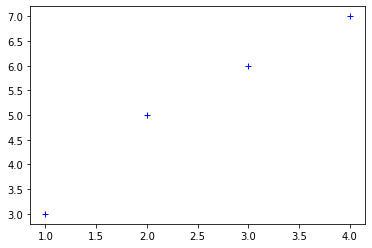

In [5]:
plt.plot([1 ,2 ,3 ,4], [3, 5, 6, 7], 'b+')

The above plot simply shows two sets of random numbers taken from a normal distribution plotted against one another. The `'ro'` argument is a shorthand argument telling matplotlib that I wanted the points represented as red circles (see our earlier short tutorial with our discussion of Python libraries).

#### Multiple plots superimposed

We can also plot many plots on top of each other:

In [6]:
# evenly sampled values between 0 and 5, at 0.2 intervals
t = np.arange(0., 5., 0.1)

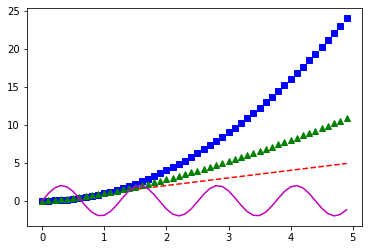

In [7]:
# red dashes, blue squares, green triangles, magenta line
import math

plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**1.5, 'g^')
plt.plot(t, 2*np.sin(5*t), 'm-')
plt.show()

#### Plotting styles

Matplotlib has also a set of predefined styles available:

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [9]:
#plt.style.use(u'fivethirtyeight')
#plt.plot(xvalues, yvalues, 'ro')
#plt.xlabel("Style: fivethirtyeight")
#plt.show()

In [10]:
# Set some Pandas options
#pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 25)

#pd.set_option('display.mpl_style', 'default')

plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (15, 5)
#plt.rc_context(rc={'font.family': 'monospace',  'font.weight': 'bold',   'font.size': 10})

We can exercise a little more control by breaking the plotting into a workflow:

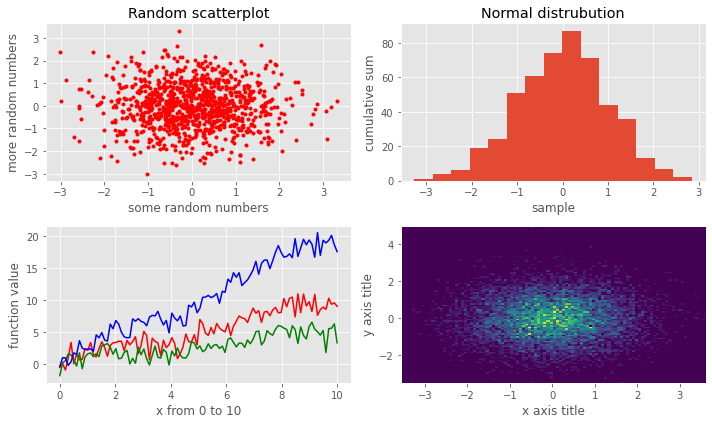

In [11]:
fig = plt.figure(figsize=(10,6))

# Create the first subfigure
sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('some random numbers')
sub1.set_ylabel('more random numbers')
sub1.set_title("Random scatterplot")
sub1.plot(np.random.randn(1000), np.random.randn(1000), 'r.')

# Create the second subfigure
sub2 = fig.add_subplot(2,2,2)
sub2.hist(np.random.normal(size=500), bins=15)
sub2.set_xlabel('sample')
sub2.set_ylabel('cumulative sum')
sub2.set_title("Normal distrubution")

# Create the third subfigure
numpoints = 100
x = np.linspace(0, 10, num=numpoints)
sub3 = fig.add_subplot(2,2,3)
sub3.plot(x, np.sin(x) + x + np.random.randn(numpoints), "r")
sub3.plot(x, np.sin(x) + 0.5 * x + np.random.randn(numpoints), "g")
sub3.plot(x, np.sin(x) + 2 * x + np.random.randn(numpoints), "b")
sub3.set_xlabel('x from 0 to 10')
sub3.set_ylabel('function value')

# Create the fourth subfigure
sub4 = fig.add_subplot(2,2,4)
x = np.random.randn(10000)
y = np.random.randn(10000)
sub4.hist2d(x,y,bins=100);
sub4.set_xlabel('x axis title')
sub4.set_ylabel('y axis title')

plt.tight_layout()
plt.savefig("normalvars.png", dpi=150)

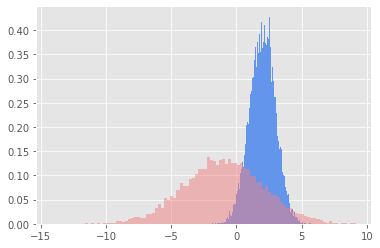

In [12]:
numpoints=10000
data1 = np.random.normal(loc=2.0, scale=1.0, size=numpoints)
data2 = np.random.normal(loc=-1.0, scale=3.0, size=numpoints)
max_data = np.r_[data1, data2].max()
# bins = np.linspace(-max_data, max_data, 10 * max_data + 1)
plt.hist(data1, bins=int(np.sqrt(numpoints)), density=True, color="#6495ED", alpha=1.0)
plt.hist(data2, bins=int(np.sqrt(numpoints)), density=True, color="#F08080", alpha=0.5)
plt.show()

matplotlib is a relatively low-level plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

If you want to make your plots look like the plot above, you can configure the default options for matplotlib. A good idea is to "steal" the *matplotlibrc* file from [Huy Nguyen](http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/) and store it under `/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc`

## Plotting in Pandas

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [13]:
normals = pd.Series(np.random.normal(size=10))
normals.head()

0   -1.004982
1   -1.240244
2   -0.692726
3    1.854865
4   -0.034193
dtype: float64

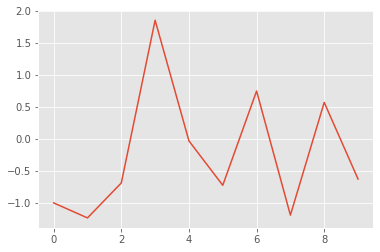

In [14]:

normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

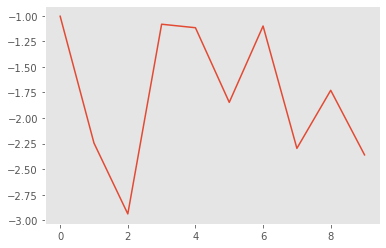

In [15]:
normals.cumsum().plot(grid=False)

Similarly, for a DataFrame:

In [16]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables

,normal,gamma,poisson
0,-0.957204,0.426057,1
1,0.701073,1.045991,1
2,-1.214206,0.115087,0
3,0.120534,0.837226,1
4,-0.695226,1.902157,2
...,...,...,...
95,-0.084027,1.877694,3
96,2.026478,0.442886,0
97,0.021024,1.379776,2
98,-0.705790,4.235092,1


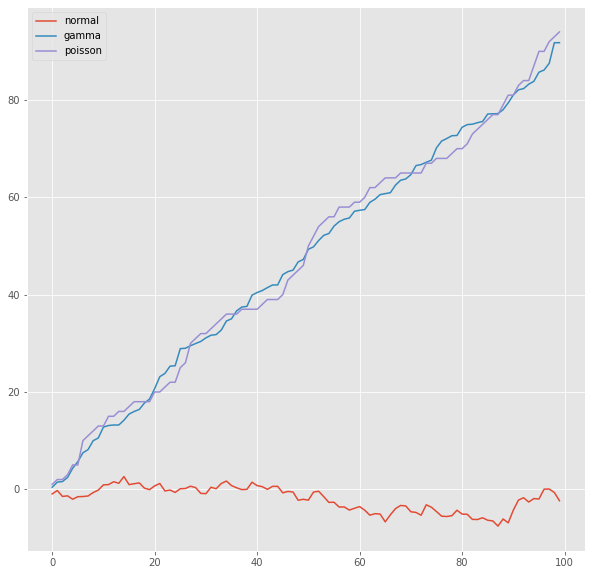

In [17]:
variables.cumsum(0).plot(figsize=(10,10))

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5074e47090>,
      dtype=object)

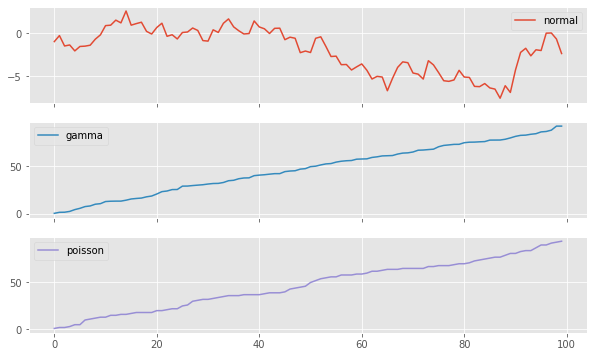

In [18]:
variables.cumsum(0).plot(subplots=True,figsize=(10,6))

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

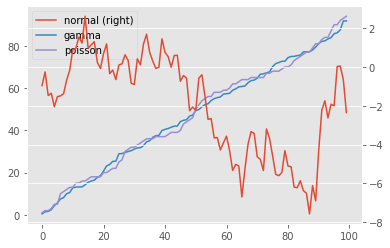

In [19]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

In [20]:
for i,var in enumerate(['normal','gamma','poisson']):
    print("i=",i)
    print("var=",var)

i= 0
var= normal
i= 1
var= gamma
i= 2
var= poisson


Text(0, 0.5, 'cumulative sum (poisson)')

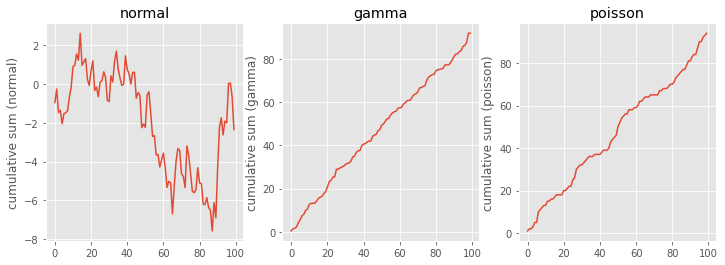

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum (normal)')
axes[1].set_ylabel('cumulative sum (gamma)')
axes[2].set_ylabel('cumulative sum (poisson)')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up a dataset with the passengers from Titanic (https://dl.dropboxusercontent.com/u/16006464/DwD_Fall2014/titanic.xls):

In [22]:
titanic = pd.read_excel("https://storage.googleapis.com/datasets_nyu/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


And let's run a couple of SQL-like queries on the DataFrame object that we just loaded:

In [23]:
titanic.groupby('pclass').survived.sum()

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

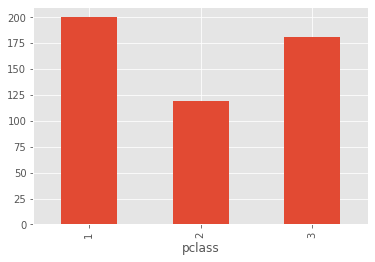

In [24]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

In [25]:
titanic.groupby(['sex','pclass']).survived.mean()

sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
Name: survived, dtype: float64

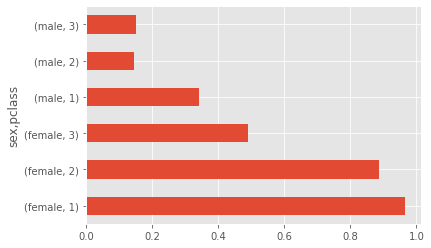

In [26]:
titanic.groupby(['sex','pclass']).survived.mean().plot(kind='barh')

In [27]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts

survived       False  True
pclass sex                
1      female      5   139
       male      118    61
2      female     12    94
       male      146    25
3      female    110   106
       male      418    75

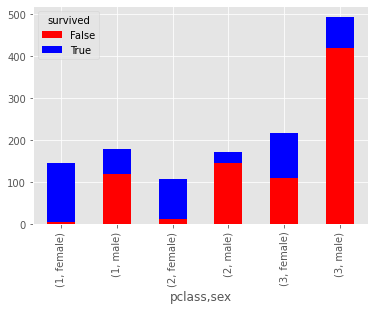

In [28]:
death_counts.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

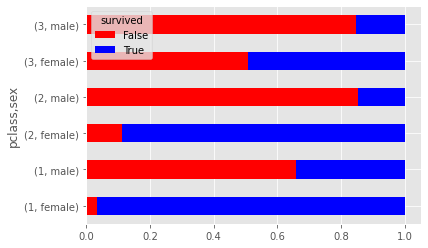

In [29]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['red','blue'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

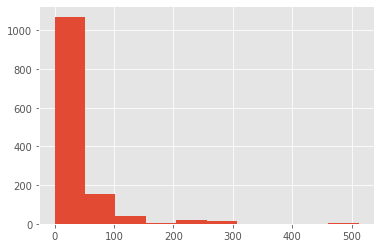

In [30]:
titanic["fare"].hist()

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

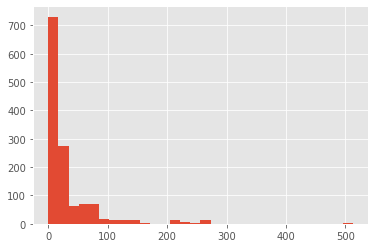

In [31]:
titanic.fare.hist(bins=30)

There are algorithms for determining an ["optimal" number of bins](https://en.wikipedia.org/w/index.php?title=Histogram&oldid=548769683#Number_of_bins_and_width), each of which varies somehow with the number of observations in the data series. Here is the implementation for three such heuristics:

In [32]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

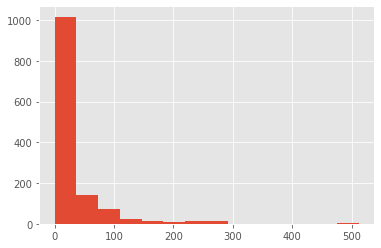

In [33]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

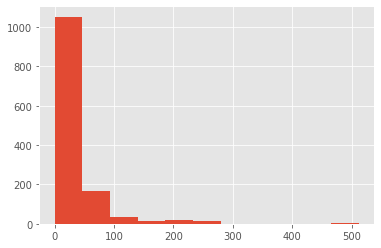

In [34]:
titanic.fare.hist(bins=sturges(len(titanic)))

### Exercise

Create a histogram for the **ages** of the passengers

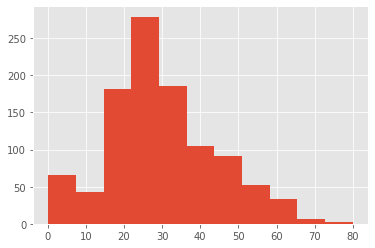

In [35]:
### your code here
titanic.age.hist(bins=sturges(len(titanic)))

## Density plot

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

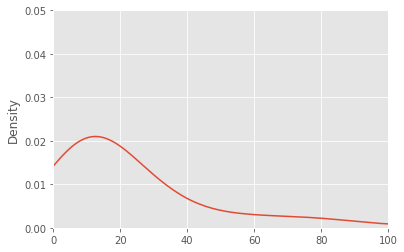

In [36]:
#df = titanic.fare.dropna()
titanic["fare"].plot(kind='kde', xlim=(0,100), ylim=(0,0.05))

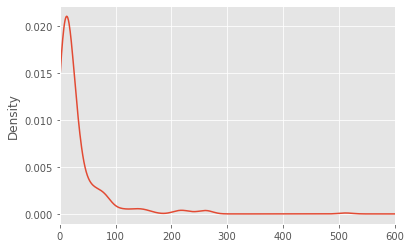

In [37]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

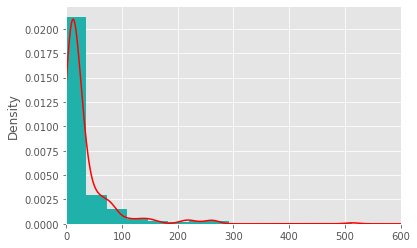

In [40]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()),  density=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r-')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

### Exercise

Create a density plot for the **ages** of the passengers

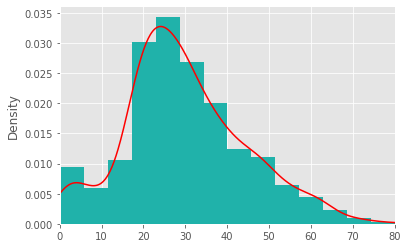

In [42]:
### your code here
titanic.age.hist(bins=doanes(titanic.fare.dropna()),  density=True, color='lightseagreen')
titanic.age.dropna().plot(kind='kde', xlim=(0,80), style='r-')

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


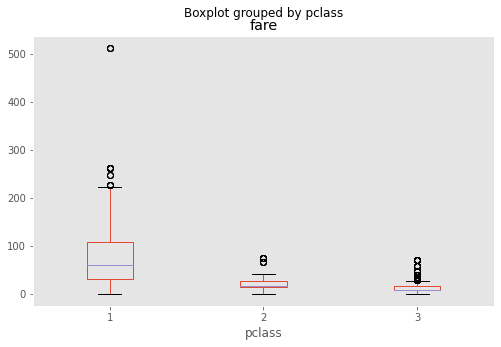

In [43]:
titanic.boxplot(column='fare', by='pclass', grid=False, figsize = (8,5))

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


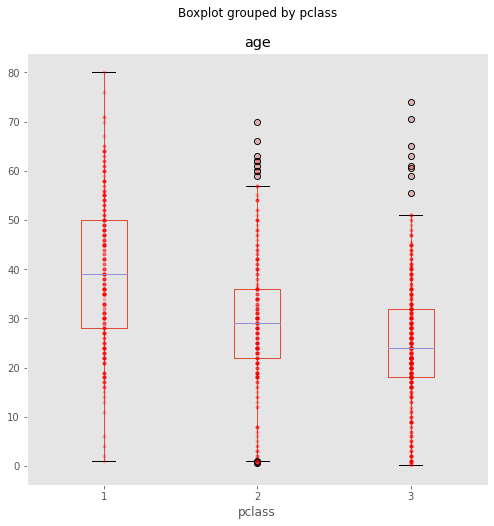

In [44]:
bp = titanic.boxplot(column='age', by='pclass', grid=False, figsize=(8,8))
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # The below is an idiom to create a list of len(y) size, all filled with the value i
    x = [i] * len(y)
    plt.plot(x, y, 'r.', alpha=0.2)

Now, you will notice something unfortunate: We have all the points stacked on top of each other. For this reason, we introduce the notion of **jitter** (i.e., small amount of noise) to allow the data points to be visible:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


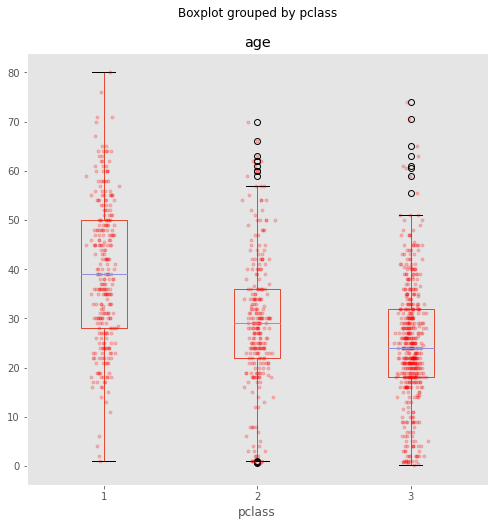

In [45]:
bp = titanic.boxplot(column='age', by='pclass', grid=False, figsize=(8,8))
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

A related but inferior cousin of the box plot is the so-called dynamite plot, which is just a bar chart with half of an error bar, unfortunately popularized through Excel:

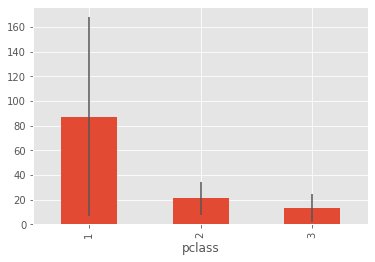

In [46]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())

Why is this plot a poor choice?

- bar charts should be used for measurable quantities (*e.g.* raw data), not estimates. The area of the bar does not represent anything, since these are estimates derived from the data.
- the "data-ink ratio" (*sensu* Edward Tufte) is very high. There are only 6 values represented here (3 means and 3 standard deviations).
- the plot hides the underlying data.

A boxplot is **always** a better choice than a dynamite plot.

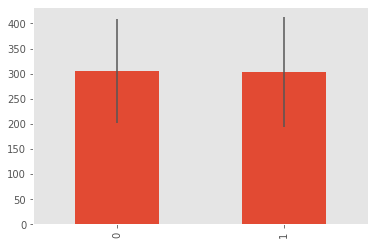

In [47]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

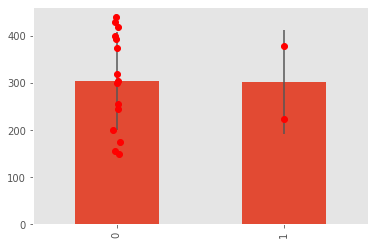

In [48]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size=len(data1)), data1, 'ro')
plt.plot([x2]*len(data2), data2, 'ro')

## Scatterplots

To look at how Pandas does scatterplots, let's load the [baseball sample dataset](https://raw.githubusercontent.com/pydata/pandas/master/doc/data/baseball.csv).

In [50]:
baseball = pd.read_csv("https://storage.googleapis.com/datasets_nyu/baseball.csv")
baseball.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. 

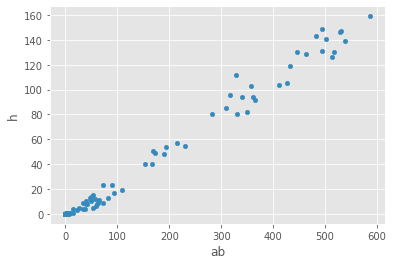

In [51]:
fig = baseball.plot(kind='scatter', x='ab', y='h')

Let's put some limits on the x and y axis:

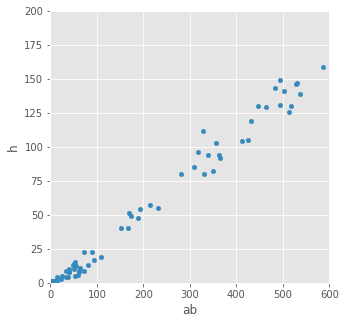

In [52]:
fig = baseball.plot(kind='scatter', x='ab', y='h', xlim=[0,600], ylim=[0,200], figsize=(5,5))

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

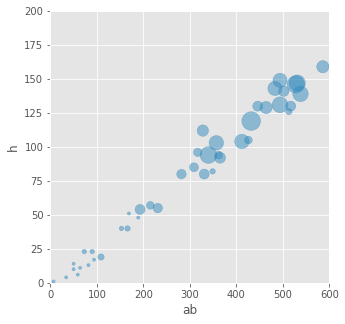

In [53]:
fig = baseball.plot(kind='scatter', x='ab', y='h', xlim=[0,600], ylim=[0,200],  figsize=(5,5), s=baseball.hr*10, alpha=0.5)

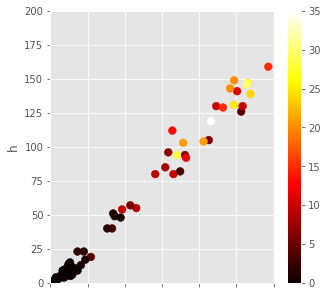

In [54]:
fig = baseball.plot(kind='scatter', x='ab', y='h', xlim=[0,600], ylim=[0,200], 
                    figsize=(5,5), c=baseball.hr, s=60, cmap='hot')

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function. It generates a matrix of pair-wise scatterplots, optionally with histograms or kernel density estimates on the diagonal.

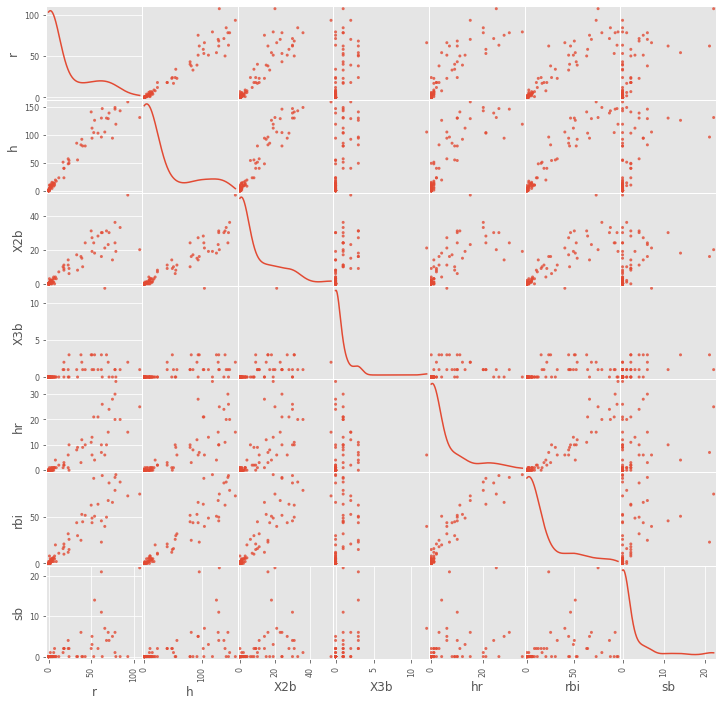

In [59]:
from pandas.plotting import scatter_matrix

fig = scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,12), diagonal='kde', alpha=0.8)

## Hexagonal Bin Plot

The hexagonal is useful when we have a very large number of points to display, and even the addition of jitter cannot transform a scatterplot into something readable. 

You can create hexagonal bin plots with DataFrame.plot() and kind='hexbin'. Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

In [60]:
df = pd.DataFrame( np.random.randn(10000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(10000)


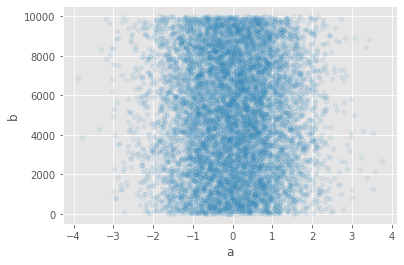

In [61]:
df.plot(kind='scatter', x='a', y='b', figsize=(6,4), alpha=0.1)

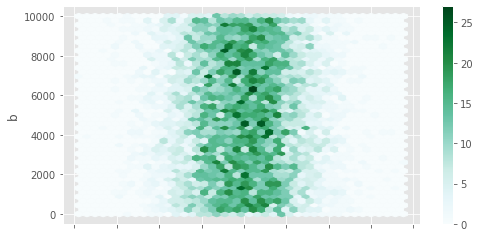

In [62]:
df.plot(kind='hexbin', x='a', y='b', gridsize=40,figsize=(8,4))

A useful keyword argument is gridsize; it controls the number of hexagons in the x-direction, and defaults to 100. A larger gridsize means more, smaller bins.